In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [3]:
df_churn = pd.read_csv('./dados/Churn.csv')

# Verificando se ha valores ausentes
df_churn.head()

,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,NaN,NaN,3.0,3.70,1.0,False
2,0.0,0.0,0.0,243.4,114.0,41.38,121.2,NaN,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,1.0,0.0,0.0,299.4,NaN,50.90,61.9,88.0,5.26,NaN,89.0,8.86,6.6,7.0,1.78,2.0,False
4,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


In [5]:
# Contando os Valores Ausentes e a porcentagem de valores ausentes
percent_missing = (df_churn.isnull().sum() / df_churn.shape[0]) * 100
print(percent_missing)

intl_plan                        3.70
voice_mail_plan                  8.06
number_vmail_messages            3.22
total_day_minutes                7.40
total_day_calls                  7.58
total_day_charge                 6.74
total_eve_minutes                2.12
total_eve_calls                  8.70
total_eve_charge                 7.52
total_night_minutes              9.26
total_night_calls                3.56
total_night_charge               1.92
total_intl_minutes               6.18
total_intl_calls                 6.40
total_intl_charge                6.06
number_customer_service_calls    8.14
churned                          0.00
dtype: float64


In [7]:
# Tratando os valores ausentes menores que 5%


# Seleciona as colunas com menos de 5% de valores ausentes
cols_to_fill = percent_missing[percent_missing < 5].index

# Preenche os valores ausentes
for col in cols_to_fill:
    if df_churn[col].dtype == 'O':  # Se for categórico (string/objeto)
        if not df_churn[col].dropna().mode().empty:  # Verifica se a moda existe
            df_churn[col] = df_churn[col].fillna(df_churn[col].dropna().mode()[0])
    else:  # Se for numérico
        df_churn[col] = df_churn[col].fillna(df_churn[col].mean())

In [8]:
# Substituindo os valores ausentes por 0
df_churn.fillna(0, inplace=True)
df_churn.head()

,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.010000,10.0,3.0,2.70,1.0,False
1,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,9.015475,0.0,3.0,3.70,1.0,False
2,0.0,0.0,0.0,243.4,114.0,41.38,121.2,0.0,10.30,162.6,104.0,7.320000,12.2,5.0,3.29,0.0,False
3,1.0,0.0,0.0,299.4,0.0,50.90,61.9,88.0,5.26,0.0,89.0,8.860000,6.6,7.0,1.78,2.0,False
4,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.410000,10.1,3.0,2.73,3.0,False


In [9]:
# Verificando se ha valores ausentes novamente 
(df_churn.isnull().sum() / df_churn.shape[0]) * 100

intl_plan                        0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churned                          0.0
dtype: float64

In [10]:
# Transformando as variaveis categoricas em numericas

label = LabelEncoder()
df_churn['churned'] = label.fit_transform(df_churn['churned'])
df_churn.groupby('churned').size()
df_churn.head()

,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.010000,10.0,3.0,2.70,1.0,0
1,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,9.015475,0.0,3.0,3.70,1.0,0
2,0.0,0.0,0.0,243.4,114.0,41.38,121.2,0.0,10.30,162.6,104.0,7.320000,12.2,5.0,3.29,0.0,0
3,1.0,0.0,0.0,299.4,0.0,50.90,61.9,88.0,5.26,0.0,89.0,8.860000,6.6,7.0,1.78,2.0,0
4,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.410000,10.1,3.0,2.73,3.0,0


In [11]:
X = df_churn.drop(['churned'], axis=1)
y = df_churn['churned']

# Normalizando os dados
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Dividindo os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Treinando o modelo de regressao logistica

model_churned = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

# Fazendo previsoes
y_pred = model_churned.predict(X_test)
y_prob = model_churned.predict_proba(X_test)[:, 1]

# Avaliando o modelo

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print('-------------------------------------------------------------')
print('Relatorio de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.7490
Precisão: 0.3250
Recall: 0.7482
F1-Score: 0.4532
-------------------------------------------------------------
Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       861
           1       0.33      0.75      0.45       139

    accuracy                           0.75      1000
   macro avg       0.64      0.75      0.65      1000
weighted avg       0.86      0.75      0.78      1000



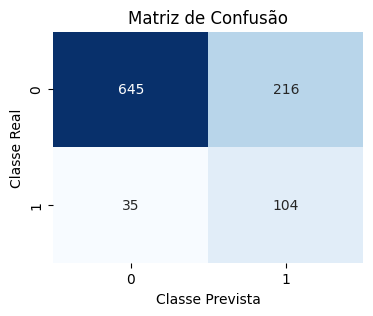

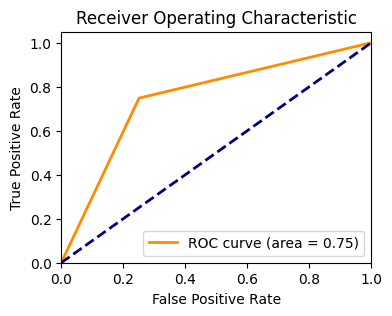

In [14]:
# Matriz de confusão

plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')

# Gerando a Curva ROC
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show() 

**Relatório Final: Modelo de Regressão Logística para Predição de Churn**

### 1. Descrição do Problema e Dataset Escolhido
O objetivo deste estudo foi desenvolver um modelo de regressão logística para prever a evasão de clientes (churn) em uma operadora de telecomunicações. O dataset utilizado contém informações sobre o uso de serviços pelos clientes, como minutos de chamadas, planos contratados e interações com o atendimento ao cliente.

### 2. Etapas de Preparação dos Dados
- **Tratamento de valores ausentes**: Valores ausentes foram identificados e substituídos por 0.
- **Codificação de variáveis categóricas**: O `LabelEncoder` foi utilizado para transformar dados categóricos em valores numéricos.
- **Divisão dos dados**: O dataset foi dividido em conjuntos de treino e teste.
- **Normalização dos dados**: O `StandardScaler` foi aplicado para padronizar as variáveis numéricas.

### 3. Resultados da Regressão Logística e Interpretação
O modelo foi treinado utilizando `LogisticRegression` com `class_weight='balanced'` para lidar com possível desbalanceamento das classes. As principais métricas obtidas foram:
- **Acurácia**: 74% Mede a taxa de previsões corretas.

- **Precisão**: 32% Indica a proporção de previsões corretas entre os casos positivos identificados.

- **Recall**: 74% Mede a capacidade do modelo de identificar corretamente os clientes que cancelaram o serviço.

- **F1-Score**: 45% Combina precisão e recall para avaliar o desempenho geral.

Além disso, foram geradas a **Matriz de Confusão**, para visualizar erros de classificação, e a **Curva ROC-AUC**, que mostrou a capacidade do modelo em distinguir entre clientes que cancelam ou não.

### 4. Avaliação e Conclusão
O modelo apresentou um desempenho razoável na predição do churn, mas algumas melhorias podem ser implementadas:
- **Engenharia de Atributos**: Explorar novas variáveis que possam melhorar a previsibilidade do modelo.
- **Testar outros algoritmos**: Modelos como Random Forest ou XGBoost podem apresentar melhores resultados.
- **Ajuste de hiperparâmetros**: Realizar otimização de parâmetros para melhorar a performance.

### 5. Reflexões
O modelo se ajustou relativamente bem ao problema, mas há espaço para melhorias. A inclusão de mais informações sobre o comportamento dos clientes e testes com diferentes abordagens de modelagem podem aumentar a precisão e utilidade do sistema de predição de churn.

